# Introducción al Análisis Exploratorio de Datos
***Exploratory Data Analysis (EDA)***

## Librerías Generales

In [1]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Información del dataset y contexto



Se tiene un dataset con información relacionada a un conjunto de pacientes, en dónde, se reúnen características que se creen son relevantes para la predicción de accidentes cerebrovasculares (ACV).

El dataset presenta la siguiente estructura:
*	id: identificador único del paciente.
*	genero: categórica. “hombre”, “mujer” u “otro”.
*	edad: numérica, edad del paciente en años.
*	hipertension: categórica. “0” no tiene hipertensión, “1” si tiene hipertensión.
*	enfermedad_corazon: categórica. “0” no tiene ninguna enfermedad del corazón, “1” si tiene al menos una.
*	casado_alguna_vez: categórica. “0” nunca estuvo ni está casado, “1” estuvo o está casado.
*	tipo_trabajo: categórica. Se incluyen 5 diferentes, son descriptivas de por sí.
*	tipo_residencia: categórica. “urbano” y “rural”.
*	nivel_glucosa: numérica, nivel promedio de glucosa en sangre.
*	imc: numérica, índice de masa corporal.
*	estado_fumador: categórica. Se incluyen 4, “fumaba”, “fuma”, “nunca”, “desconocido”. La categoría “desconocido” se utilizó para completar la información no disponible para esos pacientes.
*	apoplejia: categórica. “1” si tuvo un ACV, “0” para el caso contrario.


## Importación de datos estructurados (tabulares)

Cargar el archivo *datos_acv.zip* al área de almacenamiento de la sesión.

Aparece una advertencia sobre que la data se pierde al finalizar la sesión, por el momento eso no importa.

In [3]:
# Luego se puede descomprimir (las celdas admiten comandos de consola de linux)
!unzip datos_acv.zip

Archive:  datos_acv.zip
  inflating: datos_acv.csv           


In [4]:
# Lectura del dataset
dataset = pd.read_csv("datos_acv.csv")

In [5]:
dataset     # Podemos abrir un visor interactivo (nuevo), en la esquina inferior izquierda aparece el ícono de una varita para habilitarlo

,id,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
0,9046,hombre,67.0,0,1,1,privado,urbano,228.69,36.6,fumaba,1
1,51676,mujer,61.0,0,0,1,autonomo,rural,202.21,NaN,nunca,1
2,31112,hombre,80.0,0,1,1,privado,rural,105.92,32.5,nunca,1
3,60182,mujer,49.0,0,0,1,privado,urbano,171.23,34.4,fuma,1
4,1665,mujer,79.0,1,0,1,autonomo,rural,174.12,24.0,nunca,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,mujer,80.0,1,0,1,privado,urbano,83.75,NaN,nunca,0
5106,44873,mujer,81.0,0,0,1,autonomo,urbano,125.20,40.0,nunca,0
5107,19723,mujer,35.0,0,0,1,autonomo,rural,82.99,30.6,nunca,0
5108,37544,hombre,51.0,0,0,1,privado,rural,166.29,25.6,fumaba,0


## Exploración Inicial

In [6]:
# Para visualizar un fragmento de los datos
dataset.head(5)  # Primeros N

,id,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
0,9046,hombre,67.0,0,1,1,privado,urbano,228.69,36.6,fumaba,1
1,51676,mujer,61.0,0,0,1,autonomo,rural,202.21,NaN,nunca,1
2,31112,hombre,80.0,0,1,1,privado,rural,105.92,32.5,nunca,1
3,60182,mujer,49.0,0,0,1,privado,urbano,171.23,34.4,fuma,1
4,1665,mujer,79.0,1,0,1,autonomo,rural,174.12,24.0,nunca,1


In [7]:
dataset.tail(5)  # Últimos N

,id,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
5105,18234,mujer,80.0,1,0,1,privado,urbano,83.75,NaN,nunca,0
5106,44873,mujer,81.0,0,0,1,autonomo,urbano,125.20,40.0,nunca,0
5107,19723,mujer,35.0,0,0,1,autonomo,rural,82.99,30.6,nunca,0
5108,37544,hombre,51.0,0,0,1,privado,rural,166.29,25.6,fumaba,0
5109,44679,mujer,44.0,0,0,1,gubernamental,urbano,85.28,26.2,desconocido,0


In [8]:
# Para visualizar tipos de datos, cantidades, etc.
# Además, se evidencian valores nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   int64  
 1   genero              5110 non-null   object 
 2   edad                5110 non-null   float64
 3   hipertension        5110 non-null   int64  
 4   enfermedad_corazon  5110 non-null   int64  
 5   casado_alguna_vez   5110 non-null   int64  
 6   tipo_trabajo        5110 non-null   object 
 7   tipo_residencia     5110 non-null   object 
 8   nivel_glucosa       5110 non-null   float64
 9   imc                 4909 non-null   float64
 10  estado_fumador      5110 non-null   object 
 11  apoplejia           5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [9]:
dataset.describe()
# Genera los descriptores estadísticos básicos

,id,edad,hipertension,enfermedad_corazon,casado_alguna_vez,nivel_glucosa,imc,apoplejia
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,0.475034,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,1.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
# Para obtener los valores nulos directamente
dataset.isna().sum()

id                      0
genero                  0
edad                    0
hipertension            0
enfermedad_corazon      0
casado_alguna_vez       0
tipo_trabajo            0
tipo_residencia         0
nivel_glucosa           0
imc                   201
estado_fumador          0
apoplejia               0
dtype: int64

Según la información del dataset, en *estado_fumador* se utilizó la categoría "desconocido" para las entradas con información no disponible. Esto es equivalente a valores nulos.

In [11]:
# Aplicamos un filtro para evidencias estos valores faltantes en la información básica del dataset
dataset['estado_fumador'].replace(r'desconocido', np.nan, inplace = True)

In [12]:
dataset.isna().sum()
# Ahora se aprecia que hay una cantidad interesante de valores faltantes

id                       0
genero                   0
edad                     0
hipertension             0
enfermedad_corazon       0
casado_alguna_vez        0
tipo_trabajo             0
tipo_residencia          0
nivel_glucosa            0
imc                    201
estado_fumador        1544
apoplejia                0
dtype: int64

In [13]:
# Podemos ver esto mismo pero en forma porcentual
miss_val = dataset.isnull().sum()/len(dataset)*100
print(miss_val)

id                     0.000000
genero                 0.000000
edad                   0.000000
hipertension           0.000000
enfermedad_corazon     0.000000
casado_alguna_vez      0.000000
tipo_trabajo           0.000000
tipo_residencia        0.000000
nivel_glucosa          0.000000
imc                    3.933464
estado_fumador        30.215264
apoplejia              0.000000
dtype: float64


In [14]:
print("# Valores perdidos en la variable imc\t\t: {:.2f}%".format(miss_val['imc']))
print("# Valores perdidos en la variable estado_fumador: {:.2f}%".format(miss_val['estado_fumador']))

# Valores perdidos en la variable imc		: 3.93%
# Valores perdidos en la variable estado_fumador: 30.22%


<Axes: >

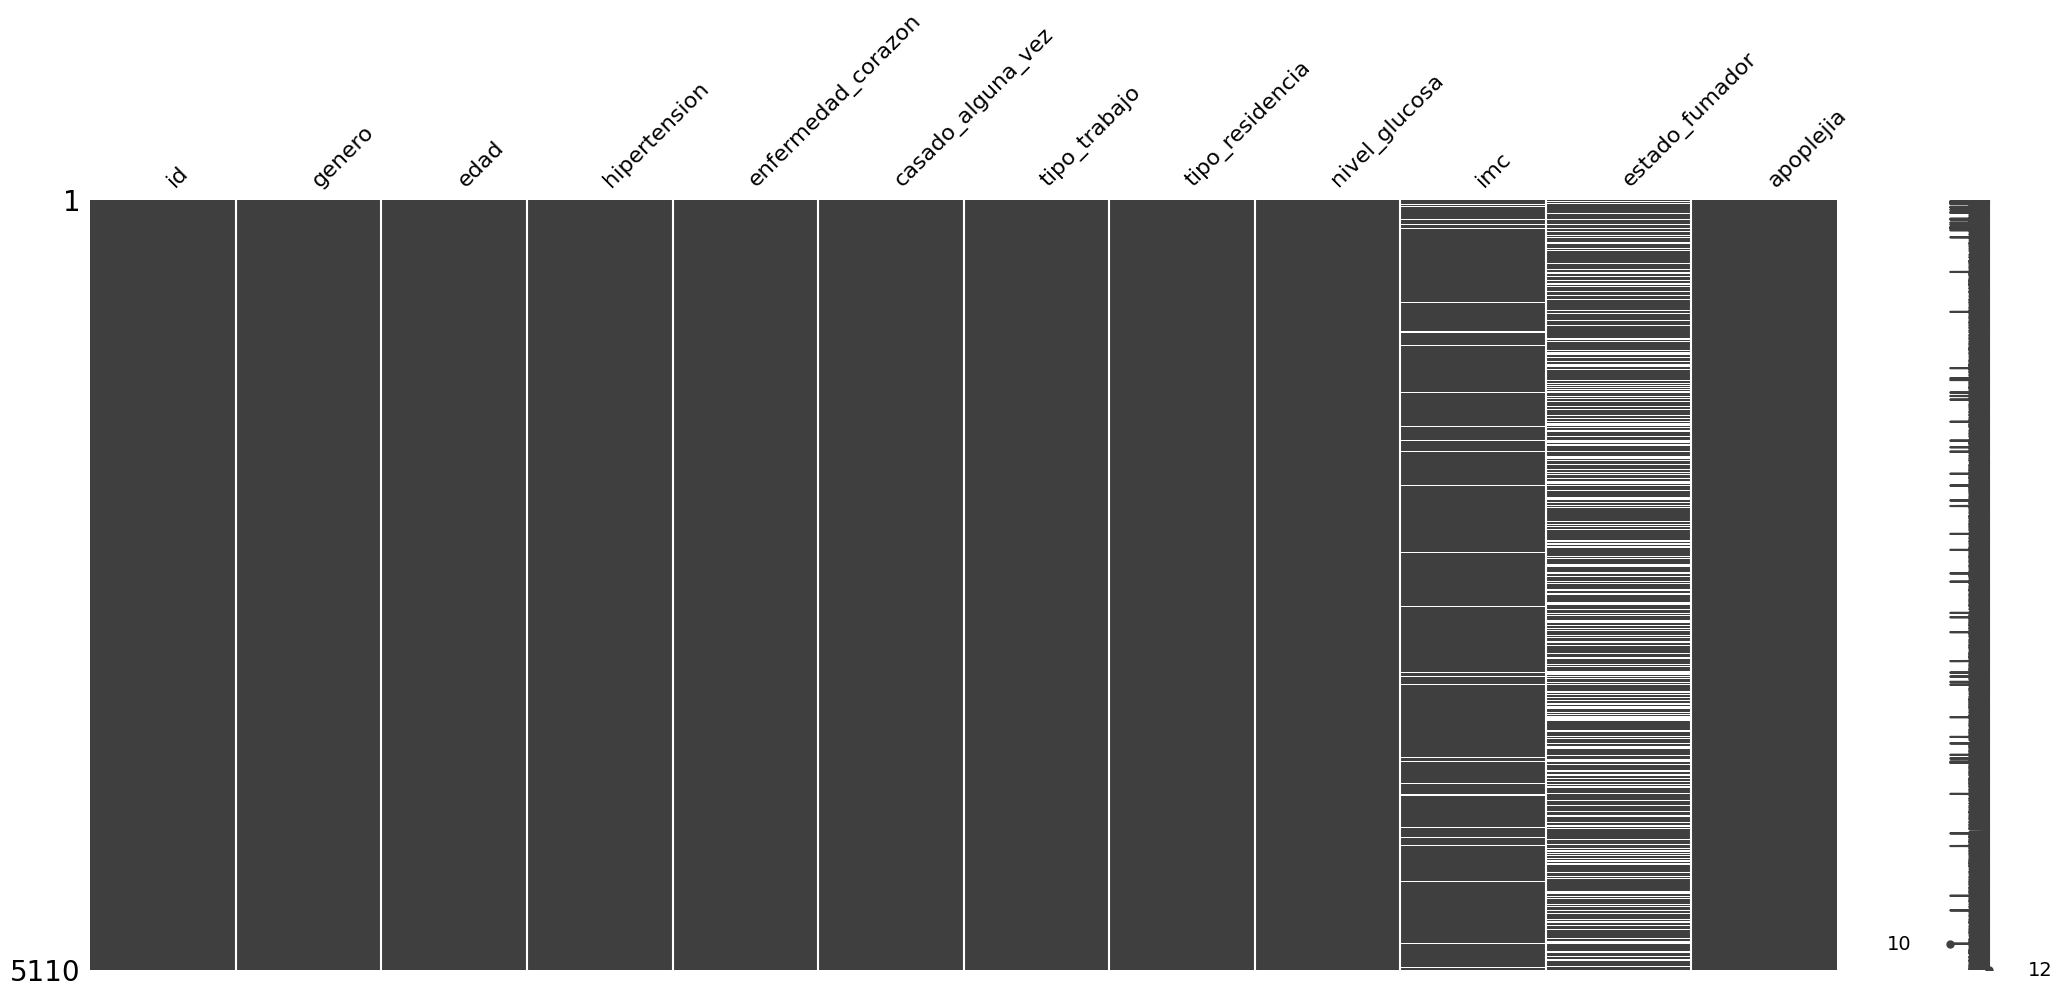

In [15]:
import missingno

missingno.matrix(dataset)
# Genera la gráfica con los huecos en los datos faltantes. Bastante intuitivo para un análisis visual rápido

### Información en las variables categóricas

In [16]:
# Categorías disponibles en las variables categóricas
for col in dataset.columns:
    if dataset[col].dtype == 'object' or (dataset[col].dtype == 'int64' and col != 'id'):
        print(col,"->", dataset[col].unique())

genero -> ['hombre' 'mujer' 'otro']
hipertension -> [0 1]
enfermedad_corazon -> [1 0]
casado_alguna_vez -> [1 0]
tipo_trabajo -> ['privado' 'autonomo' 'gubernamental' 'con_niños' 'nunca_trabajo']
tipo_residencia -> ['urbano' 'rural']
estado_fumador -> ['fumaba' 'nunca' 'fuma' nan]
apoplejia -> [1 0]


<Axes: ylabel='casado_alguna_vez'>

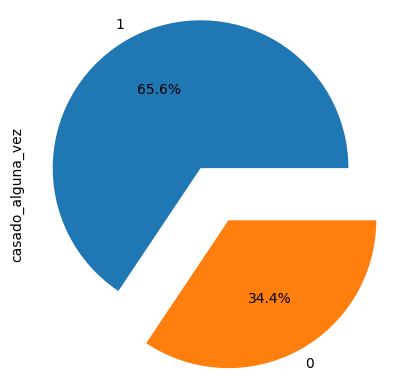

In [17]:
# Ejemplo de gráfica para una idea de las distribuciones
# En 'explode' cambiar cantidad de elementos segun el descriptor ej: tipo_residencia son 2, tipo_trabajo 5 etc
dataset['casado_alguna_vez'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.2, 0.2])

<Axes: ylabel='tipo_trabajo'>

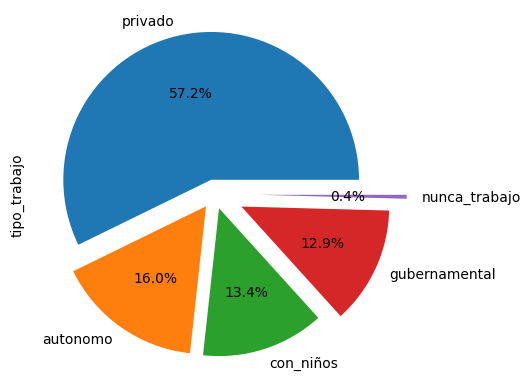

In [18]:
dataset['tipo_trabajo'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.2, 0.3])

### Imputación

In [19]:
# Para quitar columnas del dataset
dataset.pop('id')  # El valor de ID no aporta información útil si por ejemplo... queremos determinar qué lleva a que una persona tenga un ACV.

# Para quitar filas según un criterio
dataset = dataset[dataset.genero != 'otro']  # Nos quedamos con hombre y mujer solamente
dataset = dataset[dataset.tipo_trabajo != 'Never_worked'] # Quitamos los que nunca trabajaron, probablemente sean muy jóvenes. Esto lo podemos hacer por ejemplo sabiendo que la probabilidad de un ACV aumenta con la edad.

In [20]:
# Imputamos filas con valor nulo en estado fumador. (No siempre es conveniente esto, analizar)
dataset = dataset[dataset['estado_fumador'].notna()]

### Tratamiento de faltantes sin imputar

In [21]:
# Ejemplo de tratamiento de valores faltantes, se reemplazan por la media de la columna. (No siempre es conveniente esto, analizar)

dataset['imc'].fillna(dataset['imc'].median(), inplace=True)
# Se vuelve a contabilizar para testear la actualización
dataset.isna().sum()

genero                0
edad                  0
hipertension          0
enfermedad_corazon    0
casado_alguna_vez     0
tipo_trabajo          0
tipo_residencia       0
nivel_glucosa         0
imc                   0
estado_fumador        0
apoplejia             0
dtype: int64

### Correlación entre variables

<ipython-input-23-69d1ccd3fbe9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr(), annot=True)


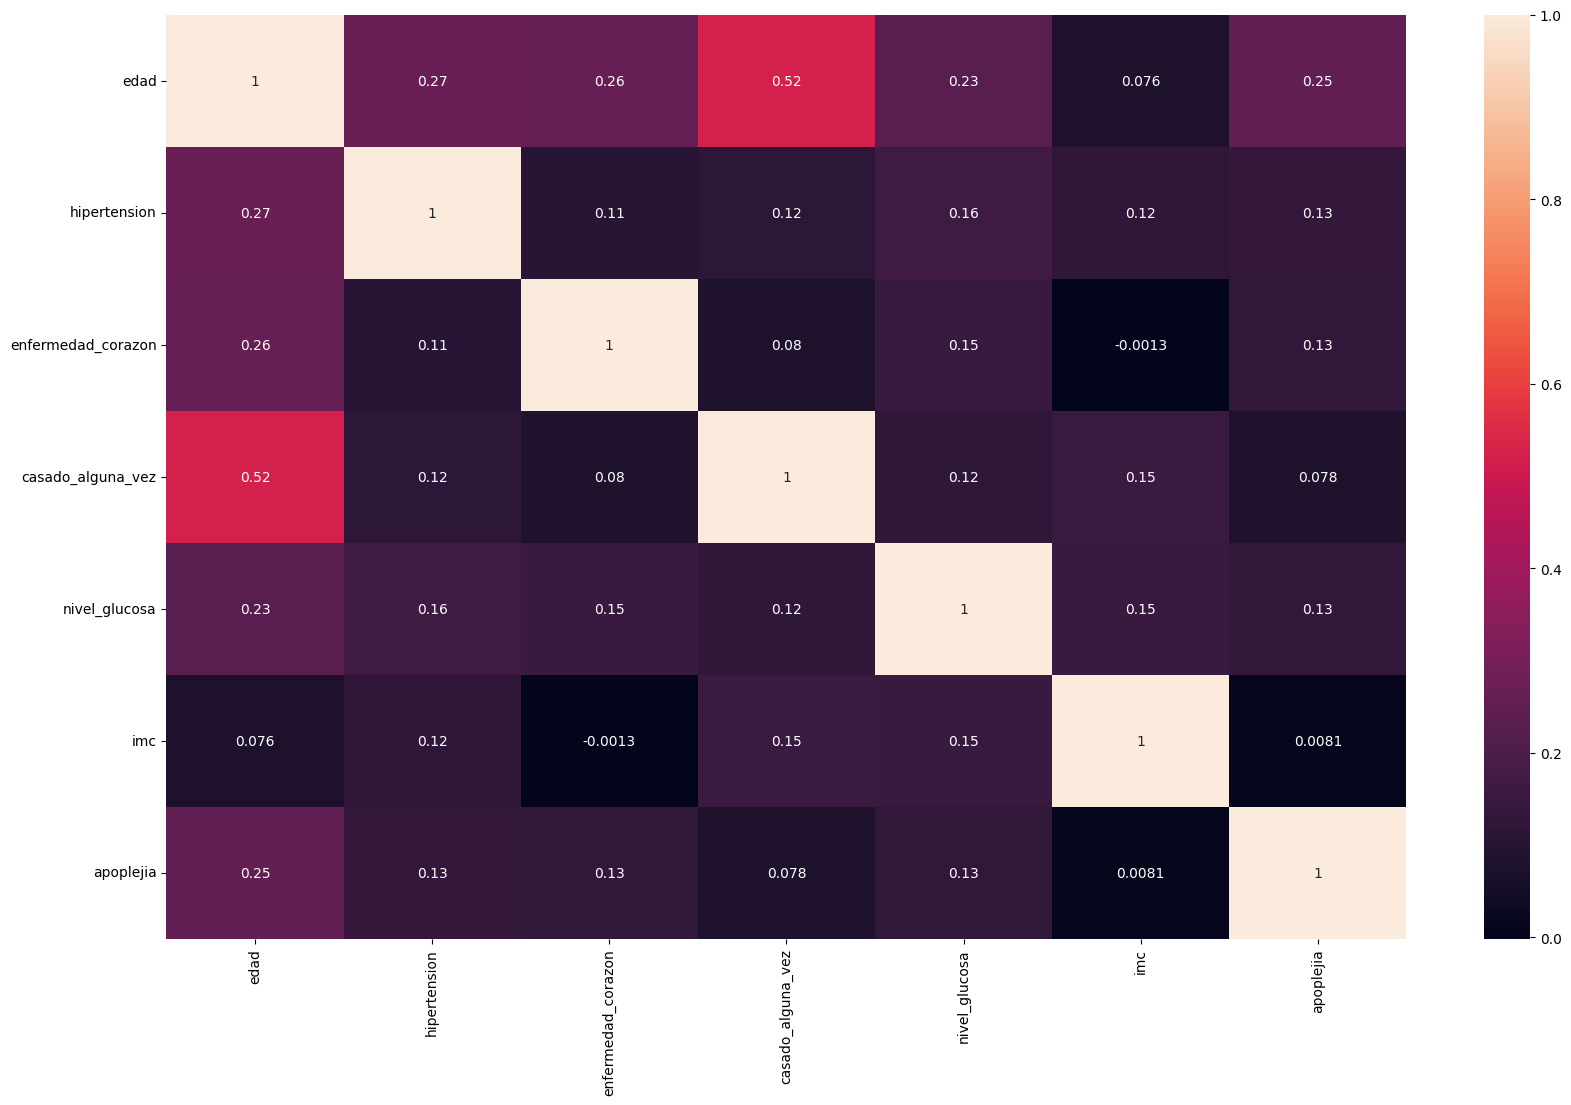

In [23]:
# Mapa de correlaciones, se puede observar dependencias entre columnas. Permite descartar descriptores que no aportan información nueva por ejemplo (resta costo computacional, etc.)
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# En este caso por ejemplo, se observa la mayor relación entre la edad y si estuvieron casados.
# Tiene sentido porque la gente comienza a casarse a partir de cierta edad.

Cabe aclarar que el mapa de correlaciones puede realizarse únicamente para variables numéricas.

Para poder extraer información de las categóricas que existen en el dataset como cosas no numéricas (lo que se indica como *object* en el *Dtype* del *DataFrame*), es necesario transformarlas.
Lo más básico es emplear una codificación numérica.

El coeficiente de correlación solo mide correlaciones lineales (“a medida que X aumenta, Y generalmente sube/baja”). La métrica puede omitir por completo relaciones no lineales (por ejemplo, “como X se acerca a 0, Y generalmente aumenta”). La Figura de abajo muestra una variedad de conjuntos de datos junto con su coeficiente de correlación. Observe cómo todos los gráficos de la fila inferior tienen un coeficiente de correlación igual a 0, a pesar de que sus ejes claramente no son independientes: estos son ejemplos de relaciones no lineales. Además, la segunda fila muestra ejemplos donde el el coeficiente de correlación es igual a 1 o –1; Note que esto no tiene nada que ver con la pendiente.
Por ejemplo: su altura en pulgadas tiene un coeficiente de correlación de 1 con su altura en
pies o en nanómetros.

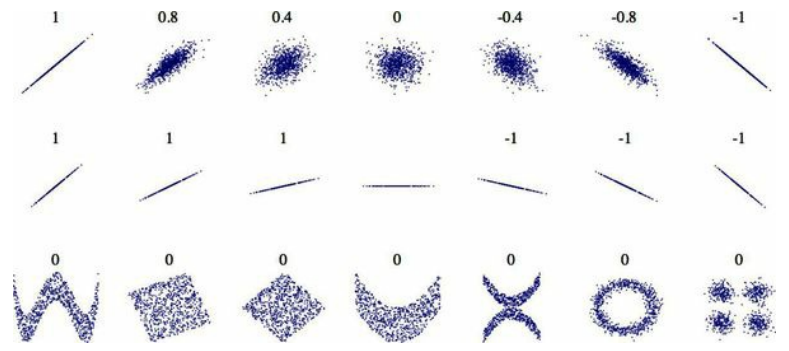

***Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow***. Aurélien Géron. 2023.

### Codificación de categóricas

Se pueden codificar numéricamente las categorías definidas con etiquetas. Ej.: en lugar de “urbano” y “rural” en tipo_residencia, quedaría 0 y 1.
Sería el equivalente a un mapeo bidireccional, en cualquier momento podemos recuperar el valor categórico asociado.

Para este proceso se podría hacer un reemplazo de este estilo mediante un bucle, mediante un filtro para ganar en eficiencia, o utilizar librerías especializadas para no reinventar la rueda.

In [24]:
# Transformación de datos
from sklearn.preprocessing import LabelEncoder

# sklearn lo utilizamos después para clasificación, regresión, redes neuronales. Pero no viene mal pispear algunas de sus cualidades ya.

le = LabelEncoder()

for col in dataset.columns:
    if dataset[col].dtype == 'object':
        # Si son columnas 'object', se codifican como numéricas. En esencia, siguen siendo categóricas.
        dataset[col] = le.fit_transform(dataset[col])   # Con le.inverse_transform() recuperamos luego la etiqueta original

In [25]:
for col in dataset.columns:
    if dataset[col].dtype == 'object' or (dataset[col].dtype == 'int64'):
        print(col,"->", dataset[col].unique())

# Ahora tenemos números en lugar de palabras, estamos más cerca de poder operar matemáticamente la información contenida en el dataset

genero -> [0 1]
hipertension -> [0 1]
enfermedad_corazon -> [1 0]
casado_alguna_vez -> [1 0]
tipo_trabajo -> [4 0 2 1 3]
tipo_residencia -> [1 0]
estado_fumador -> [1 2 0]
apoplejia -> [1 0]


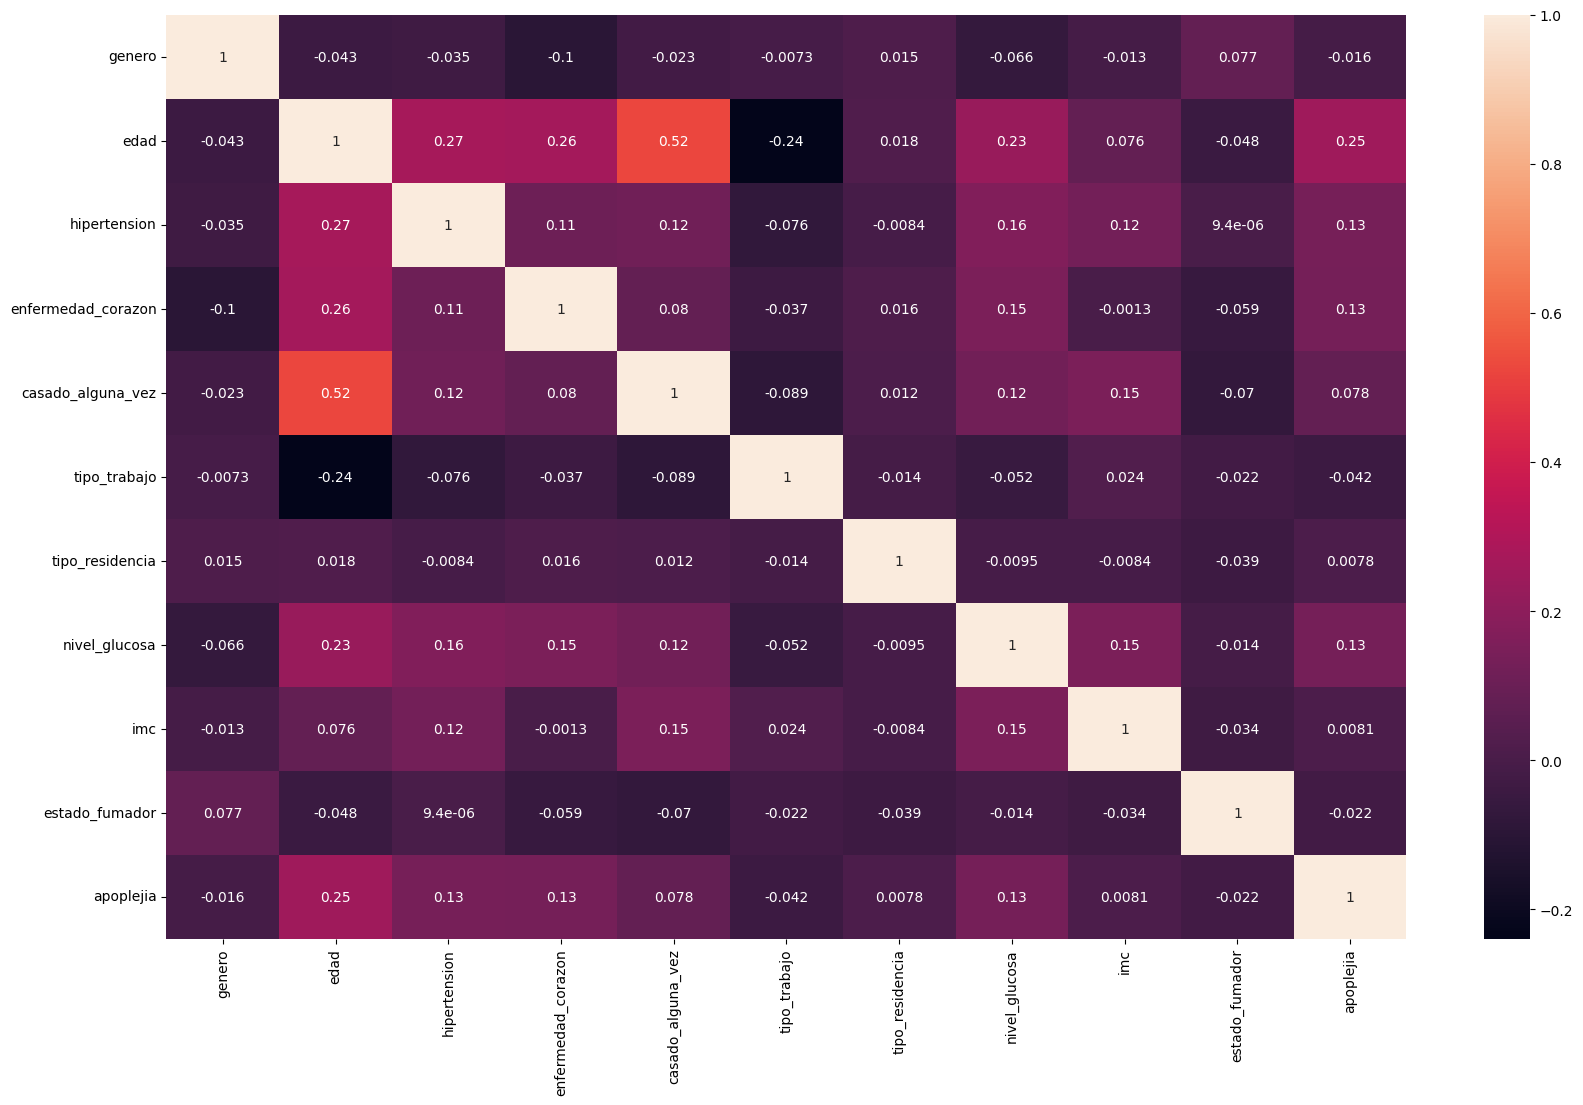

In [26]:
# Ahora es posible realizar un mapa de correlaciones incluyendo las variables transformadas
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

### Más gráficas

Se ejemplifican las distribuciones respecto a la variable de salida.

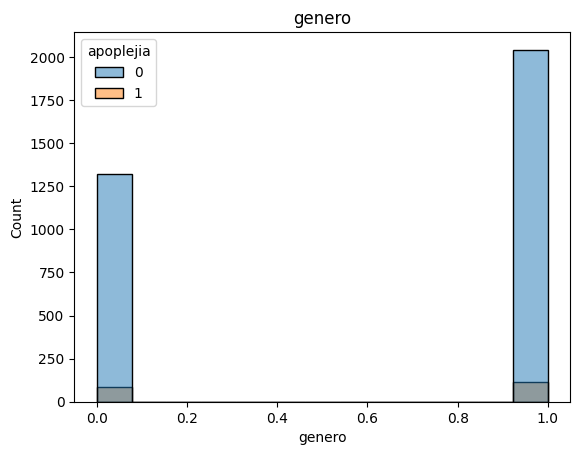

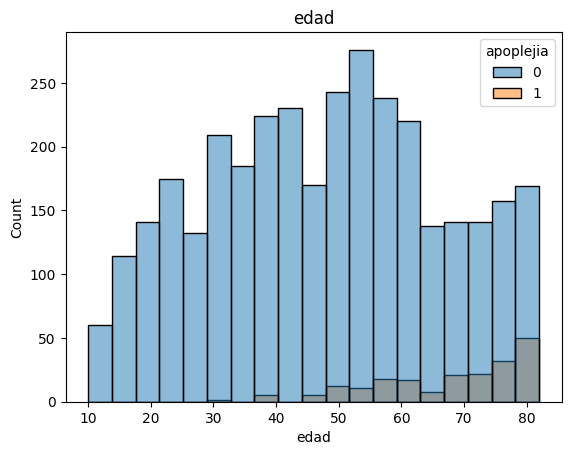

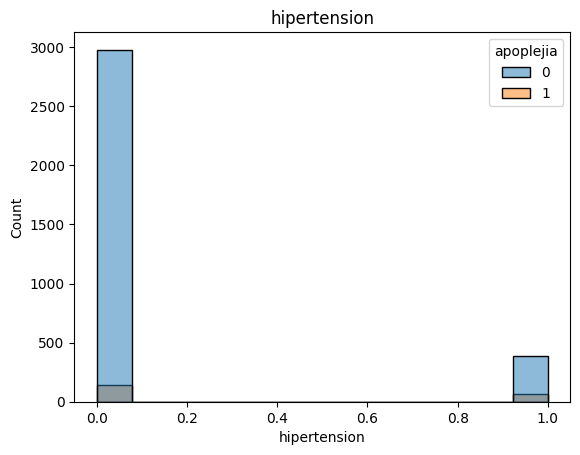

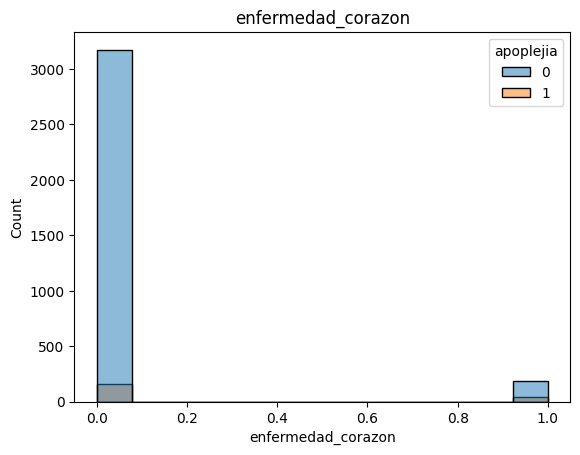

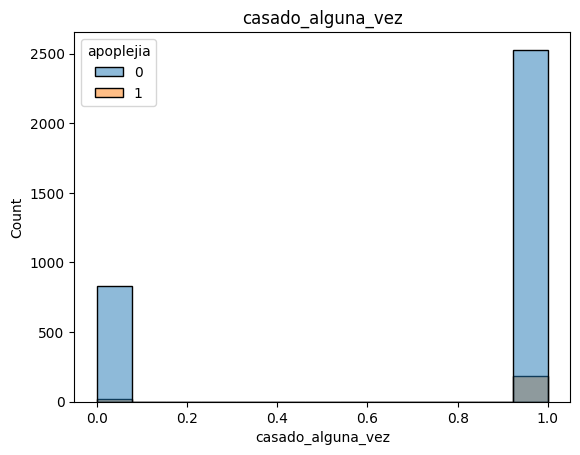

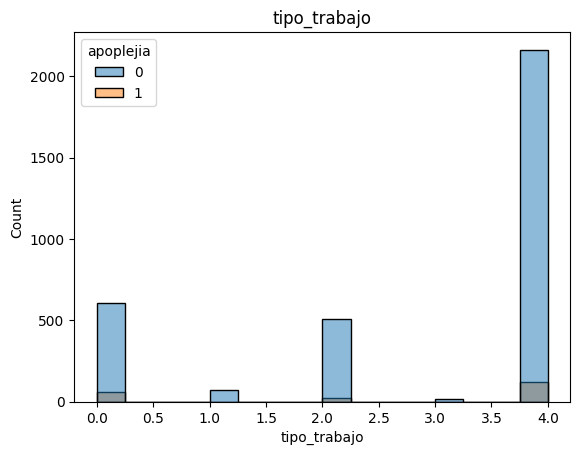

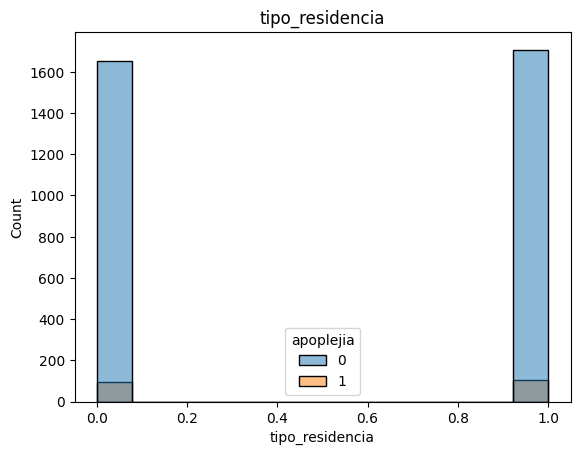

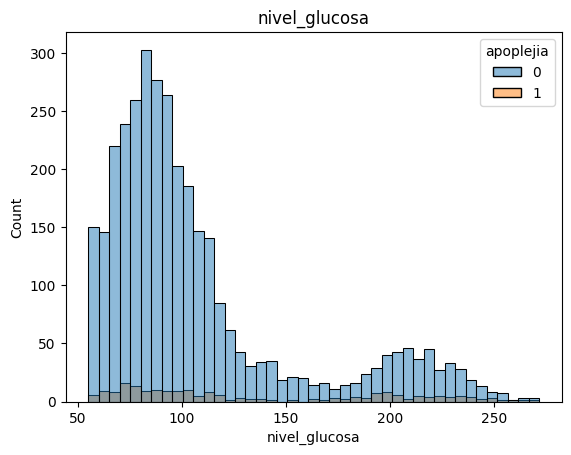

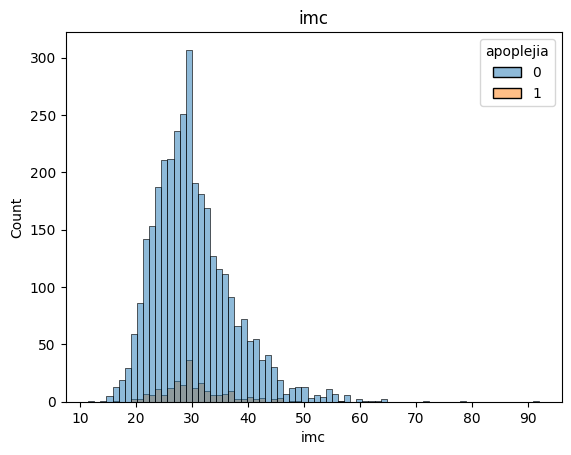

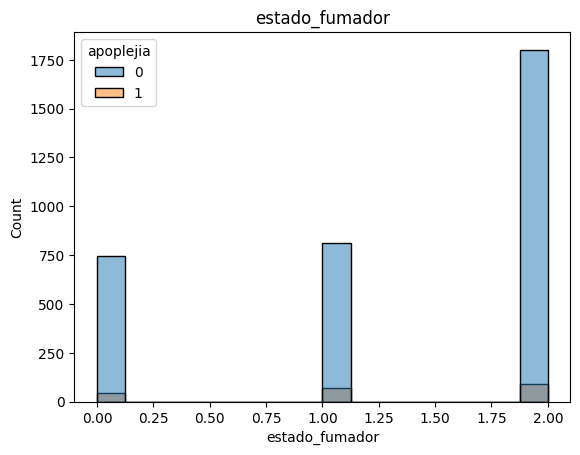

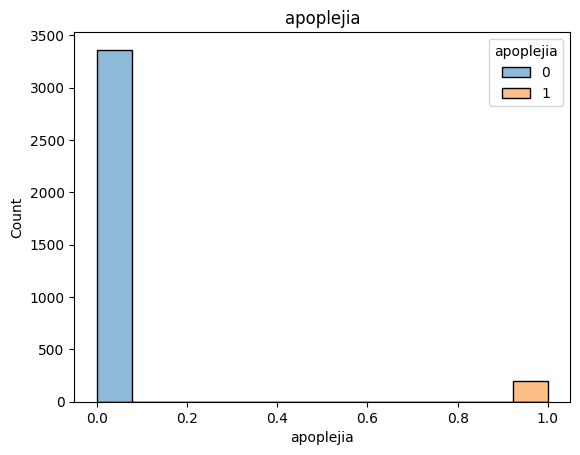

In [27]:
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='apoplejia')
    plt.show()

Gráficos de barra

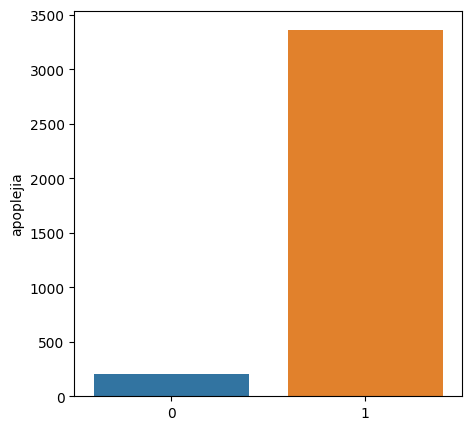

In [28]:
# El set esta bastante desbalanceado, esto es un problema serio si por ejemplo se busca entrenar un clasificador
# El problema puede venir de un muestreo sesgado por ejemplo (no quiere decir que este sea un caso)

plt.rcParams['figure.figsize'] = (5,5)
sns.barplot(x = dataset['apoplejia'].unique(), y = dataset['apoplejia'].value_counts());

Regresión lineal con distribuciones marginales

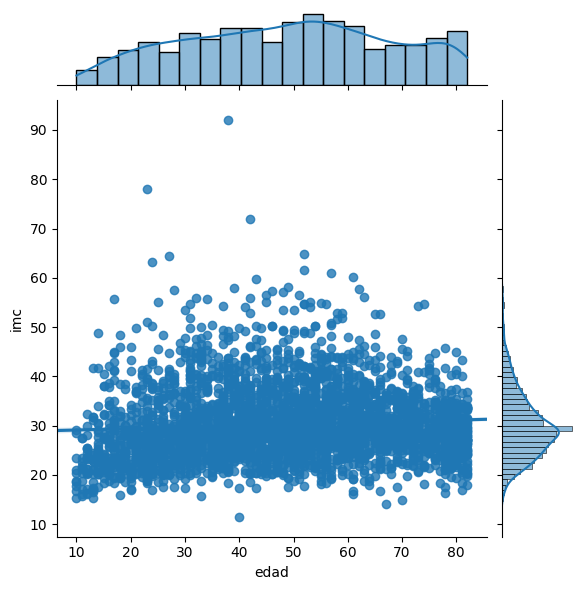

In [29]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="edad", y="imc", data=dataset,
                  kind="reg", truncate=False)

Seaborn es ideal para estudios estadísticos. Va un ejemplo más.

El uso de PairGrid puede brindarte un resumen muy rápido y de muy alto nivel de las relaciones interesantes del conjunto de datos.

Una forma muy común de usar esta gráfica es coloreando las observaciones por una variable categórica separada. Se ejemplifica con la categórica de salida (apoplejia).



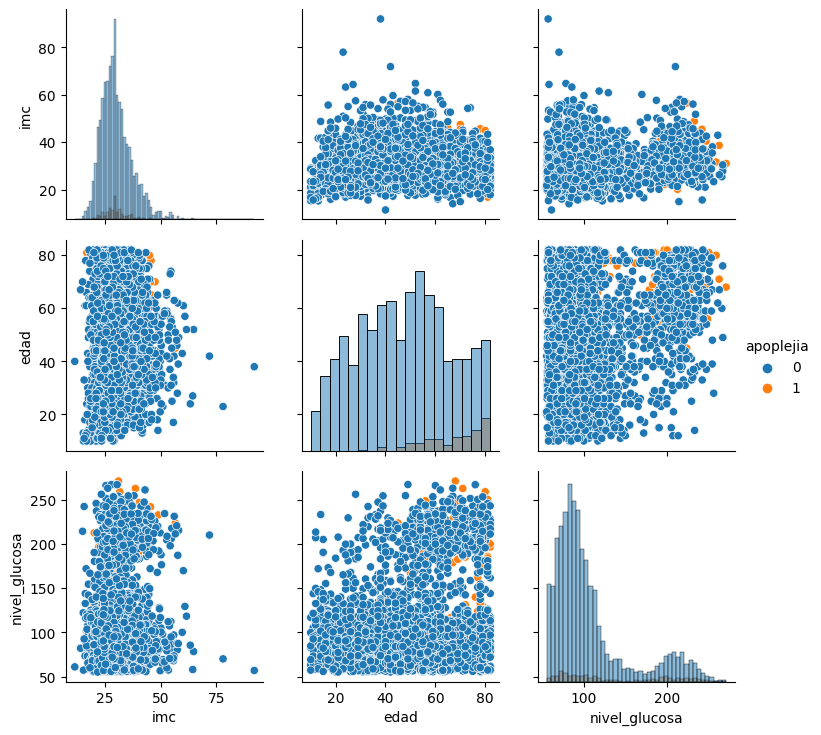

In [30]:
g = sns.PairGrid(dataset[['imc', 'edad', 'nivel_glucosa', 'apoplejia']], hue="apoplejia")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Para más: *seaborn: statistical data visualization* en  https://seaborn.pydata.org/.

### Outliers

Para identificar las variables con outliers, se realizan diagramas de caja y bigote, por ejemplo.

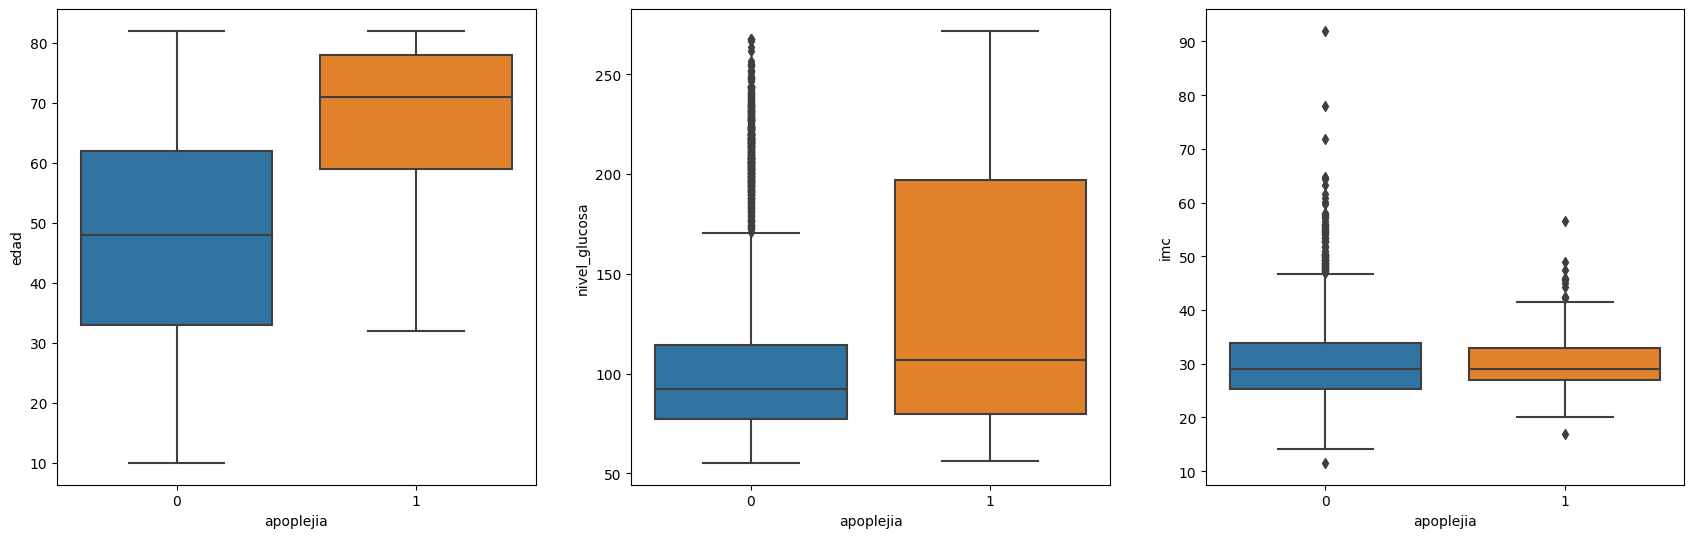

In [31]:
dataset_numericas = dataset.select_dtypes('float64')    # Tiene sentido buscar outliers en datos flotantes

plt.rcParams['figure.figsize'] = (21,21)
for i, col in enumerate(dataset_numericas.columns, 1):
    plt.subplot(3,3,i)
    ax = sns.boxplot(y = col , x = "apoplejia", data = dataset)

Se puede descartar por inspección visual los outliers más evidentes en las variables

In [32]:
# Ejemplo de descarte a partir de umbrales
dataset = dataset.drop(index=dataset.query('imc > 80 | nivel_glucosa > 250').index, axis=1)

Por dar más ejemplos, se podría descartar valores que superen el valor 3 en el **zscore** de la variable estandarizada, etc. etc. Todo depende del caso y de las herramientas estadísticas que se adecuan a los datos.

**zscore** es un submódulo de *stats*, perteneciente a *scipy*.

In [33]:
# Para este punto del análisis, el dataset pasa a tener una reducción interesante de filas
# Originalmente tenía poco más de 5100 entradas, de las cuáles se han determinado bajo riguroso análisis que son válidas:
len(dataset)

3543

# EXTRA: Visualización Efectiva de Datos

* ¿Qué tipo de gráficas me permiten representar mejora la información?
* ¿El tipo de dato importa?
* ¿La consistencia y estética?
* ¿Qué es apropiado para analizar o representar la información?

[*How to Choose the Right Chart Type*](https://www.kdnuggets.com/2019/03/how-choose-right-chart-type.html)

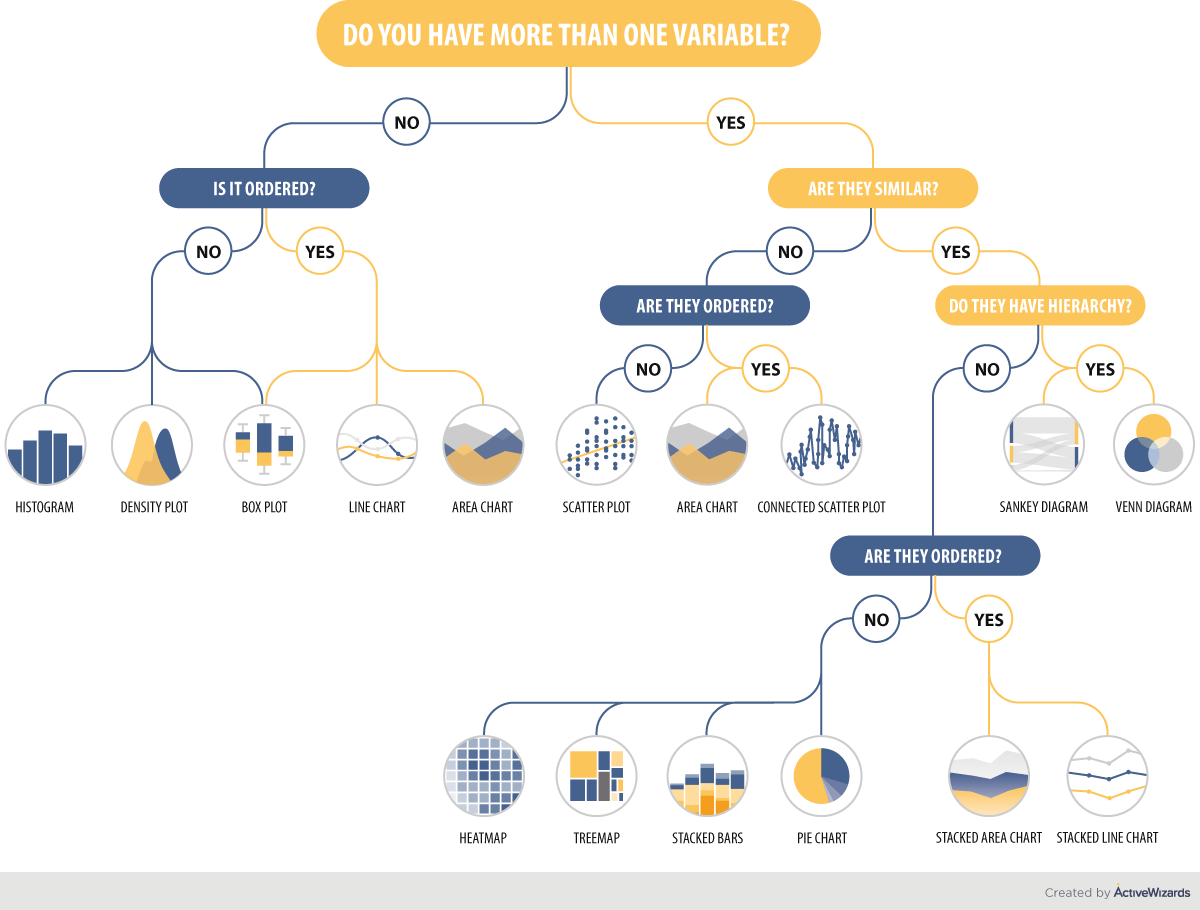

Recomendado:  [*From Data to Viz*](https://www.data-to-viz.com/)

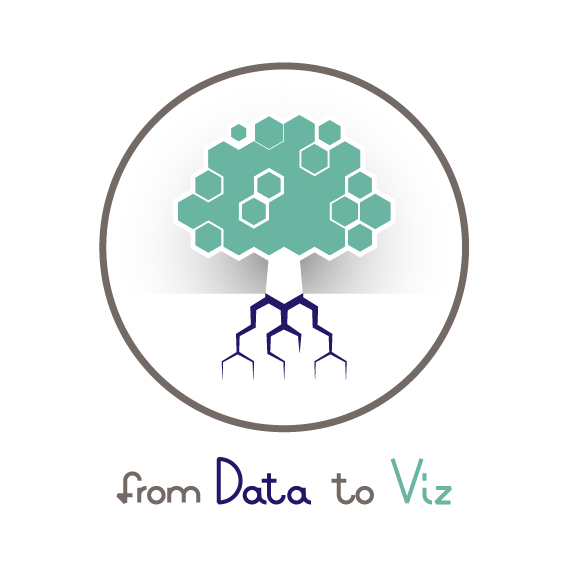

"*From Data to Viz* lo lleva al gráfico más apropiado para sus datos. Se vincula al código para compilarlo y enumera las advertencias comunes que debes evitar."

Proporciona un árbol de decisiones basado en el formato de los datos de entrada. Este árbol conduce a veinte formatos que representan los tipos de conjuntos de datos más comunes.

# Referencias y Recursos

*   https://numpy.org/doc/stable/
*   https://pandas.pydata.org/
*   https://seaborn.pydata.org/
*   https://matplotlib.org/
*   https://matplotlib.org/stable/plot_types/index.html
*   https://docs.scipy.org/doc/scipy/reference/stats.html
*   https://www.data-to-viz.com/